TBD: Header 

# Visulizing spatial information - California Housing

This demo shows a simple workflow when working with geospatial data:

 * Obtaining a dataset which includes geospatial references.
 * Obtaining a desired geometries (boundaries etc.)
 * Visualisation 
 
In this example we will make a simple **proportional symbols map** using the `California Housing` dataset in `sklearn` package.


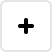
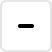
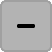
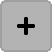
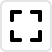
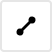
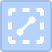

In [17]:
import numpy as np
import pandas as pd
import geopandas as gpd
from lets_plot import *

LetsPlot.setup_html()

## Prepare the dataset

In [18]:
from sklearn.datasets import fetch_california_housing

california_housing_bunch = fetch_california_housing()
data = pd.DataFrame(california_housing_bunch.data, columns=california_housing_bunch.feature_names)

# Add $-value field to the dataframe.
# dataset.target: numpy array of shape (20640,)
# Each value corresponds to the average house value in units of 100,000.
data['Value($)'] = california_housing_bunch.target * 100000
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Value($)  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122.25  341300.0  
4    -122.25  342200.0

In [19]:
# Draw a random sample from the data set.
data = data.sample(n=1000)

## Static map

Let's create a static map using regular `ggplot2` geometries.

Various shape files related to the state of California are available at https://data.ca.gov web site.

For the purpose of this demo the Calofornia State Boundaty zip was downloaded from 
https://data.ca.gov/dataset/ca-geographic-boundaries and unpacked to `ca-state-boundary` subdirectory.

### Use `geopandas` to read a shape file to GeoDataFrame

In [20]:
CA = gpd.read_file("./ca-state-boundary/CA_State_TIGER2016.shp")
CA.head()

REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-13317677.375 3930590.808, -13...

Keeping in mind that our target is the housing value, fill the choropleth over the state contours using `geom_map()`function

### Make a plot out of polygon and points

The color of the points will reflect the house age and
the size of the points will reflect the value of the house.

In [21]:
# The plot base 
p = ggplot() + scale_color_gradient(name='House Age', low='red', high='green')

# The points layer
points = geom_point(aes(x='Longitude',
                        y='Latitude',
                        size='Value($)',
                        color='HouseAge'), 
                    data=data,
                    alpha=0.8)

# The map
p + geom_polygon(data=CA, fill='#F8F4F0', color='#B71234')\
  + points\
  + theme(axis_title='blank', axis_text='blank', axis_ticks='blank', axis_line='blank', axis_tooltip='blank')\
  + ggsize(600, 500)

/opt/anaconda3/envs/dev-py37/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Interactive map

The `geom_livemap()` function creates an interactive base-map super-layer to which other geometry layers are added.

### Configuring map tile server

*Lets-PLot* can fetch raster tiles from a 3d-party ZXY-type [tile servers](https://wiki.openstreetmap.org/wiki/Tile_servers).

Lets use *Wikimedia Maps* provided by [Wikimedia Foundation](https://foundation.wikimedia.org/wiki/Maps_Terms_of_Use) as our tile server.

In [22]:
LetsPlot.set(maptiles_zxy(url='https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}@2x.png'))

### Make a plot similar to the one above but interactive

In [23]:
p + geom_livemap()\
  + geom_polygon(data=CA, fill='white', color='#B71234', alpha=0.5)\
  + points

/opt/anaconda3/envs/dev-py37/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


### Adjust the initial viewport

Use parameters `location` and `zoom` to define the initial viewport.

In [24]:
# Pass `[lon,lat]` value to the `location` (near Los Angeles)
p + geom_livemap(location=[-118.15, 33.96], zoom=7)\
  + geom_polygon(data=CA, fill='white', color='#B71234', alpha=0.5, size=1)\
  + points

/opt/anaconda3/envs/dev-py37/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
